**Data Preprocessing and Analysis for Stock and ETF Data**

This code manages and analyzes stock and ETF data by:

1. Calculating and managing file sizes for ETF and stock data.
2. Extracting date ranges from CSV files.
3. Searching for files with encompassing date ranges.
4. Assigning stock and ETF files to decades.
5. Visualizing file size data with box and whisker plots.

Overall, this code prepares and analyzes stock and ETF data for further analysis and modeling.

In [1]:
from google.colab import drive, files
import os
drive.mount('/content/drive', force_remount=True)
import pandas as pd

Mounted at /content/drive


In [2]:
# Assume you've mounted your drive and got the path to the directory
etf_dir_path = "/content/drive/MyDrive/ai_ml_suite/datasets/spa_db/etfs"
stock_dir_path = "/content/drive/MyDrive/ai_ml_suite/datasets/spa_db/stocks"
db_path = "/content/drive/MyDrive/ai_ml_suite/datasets/spa_db"

#**Loading and Saving File Size Dictionaries**

This code block defines two functions: `save_dict` and `load_dict`. These functions are used to save and load file sizes for ETF and stock data files.

**`save_dict` Function**

The `save_dict` function takes two arguments: `file_sizes` (a dictionary containing file sizes) and `file_path` (a string specifying the path to the file). The function opens the file at `file_path` in write mode, and uses the `json` module to serialize the `file_sizes` dictionary to a JSON string. The JSON string is then written to the file.

**`load_dict` Function**

The `load_dict` function takes one argument: `file_path` (a string specifying the path to the file). The function opens the file at `file_path` in read mode, and uses the `json` module to deserialize the JSON string in the file to a dictionary. The function returns the resulting dictionary.

**Loading File Sizes**

The code then uses the `load_dict` function to load the file sizes for ETF and stock data files. The file sizes are stored in JSON files located in the database path (`db_path`). The `f'{db_path}/etf_file_sizes.json'` and `f'{db_path}/stock_file_sizes.json'` strings are used to construct the file paths for the ETF and stock file size JSON files, respectively. The resulting dictionaries are stored in the `etf_f_sizes` and `stock_f_sizes` variables.

In [3]:
import json
import numpy as np
import matplotlib.pyplot as plt

def save_dict(file_sizes, file_path):
    with open(file_path, 'w') as f:
        json.dump(file_sizes, f)

def load_dict(file_path):
    with open(file_path, 'r') as f:
        file_sizes = json.load(f)
    return file_sizes

etf_f_sizes = load_dict(f'{db_path}/etf_file_sizes.json')
stock_f_sizes = load_dict(f'{db_path}/stock_file_sizes.json')

#**Calculating File Sizes**

This code block defines a function `file_sizes` that takes a directory path as an argument. The function uses the `os` module to list all files in the directory, and creates an empty dictionary to store the file name and size pairs.

**Looping Through Files**

The function then loops through each file in the directory. For each file, it gets the file path and name, and checks if the file is a CSV file. If it is, it uses the `os` module to get the file size, and adds the file name and size (in KB) to the dictionary.

**Returning the Dictionary**

The function returns the dictionary containing the file name and size pairs.

**Calling the Function**

The code then calls the `file_sizes` function with the ETF and stock directory paths as arguments. The resulting dictionaries are stored in the `etf_f_sizes` and `stock_f_sizes` variables.

**Saving the Dictionary to JSON Files**

The code then uses the `save_dict` function (defined earlier) to save the file size dictionaries to JSON files in the database path (`db_path`).

**Printing the Dictionary**

Finally, the code prints the `etf_f_sizes` and `stock_f_sizes` dictionaries to the console

In [ ]:
def file_sizes(dir_path):
  # List all files in the directory
  files = os.listdir(dir_path)

  # Create an empty dictionary to store the file name and size pairs
  f_sizes = {}

  # Loop through each file in the directory
  for file in files:
      # Get the file path and name
      file_path = os.path.join(dir_path, file)
      file_name = os.path.basename(file_path)

      # Check if the file is a CSV file
      if file_path.endswith('.csv'):
          # Read the CSV file using pandas
          #df = pd.read_csv(file_path)

          # Get the file size
          file_size = os.path.getsize(file_path)

          # Add the file name and size (in KB) to the dictionary
          f_sizes[file_name] = file_size / 1024

  # return the dictionary
  return f_sizes

etf_f_sizes = file_sizes(etf_dir_path)
stock_f_sizes = file_sizes(stock_dir_path)

# Save dicts to json files
save_dict(etf_f_sizes, f'{db_path}/etf_file_sizes.json')
save_dict(stock_f_sizes, f'{db_path}/stock_file_sizes.json')

# Print the dictionary
print(etf_f_sizes)
print(stock_f_sizes)

# **Find top 500 ETF and 1000 stock files by size:**

**Function Descriptions**

**`save_dict`**: Saves a dictionary to a JSON file.

**`load_dict`**: Loads a dictionary from a JSON file.

**`file_sizes`**: Calculates the file sizes for all CSV files in a directory and returns a dictionary of file names and sizes.

**`top_n_vals`**: Returns the top `n` files with the largest size from a file size dictionary.

**Code Summary**

* Loads file size dictionaries for ETF and stock data.
* Calculates file sizes for all CSV files in ETF and stock directories.
* Saves file size dictionaries to JSON files.
* Finds top 500 ETF and 1000 stock files by size.

In [6]:
import operator
def top_n_vals(file_sizes, n):
  # assuming your dictionary is stored in a variable named 'file_sizes'

  # sort the dictionary by value (file size) in descending order
  sorted_file_sizes = sorted(file_sizes.items(), key=operator.itemgetter(1), reverse=True)

  # get the top 100 files with the largest size
  top_n_files = {file_name : file_size for file_name, file_size in sorted_file_sizes[:n]}

  # print the list of top 100 files
  return top_n_files

etf_500 = top_n_vals(etf_f_sizes, 500)
stock_1000 = top_n_vals(stock_f_sizes, 1000)

<class 'tuple'>
<class 'tuple'>


In [7]:
print(etf_500)
print(stock_1000)

{'CEF.csv': 718.95703125, 'SPY.csv': 659.7666015625, 'MDY.csv': 603.3466796875, 'EWG.csv': 588.455078125, 'EWH.csv': 587.1337890625, 'XLF.csv': 586.83984375, 'EWQ.csv': 584.90234375, 'EWA.csv': 583.3642578125, 'EWC.csv': 583.1904296875, 'EWS.csv': 582.5048828125, 'EWL.csv': 582.2548828125, 'EWN.csv': 582.240234375, 'EWP.csv': 579.9033203125, 'EWU.csv': 579.8486328125, 'EWD.csv': 579.8408203125, 'EWW.csv': 579.3505859375, 'EWJ.csv': 578.9990234375, 'EWK.csv': 577.890625, 'EWO.csv': 575.3046875, 'EWI.csv': 574.9306640625, 'EWM.csv': 572.2802734375, 'DIA.csv': 565.8828125, 'XLP.csv': 549.4580078125, 'QQQ.csv': 549.056640625, 'XLK.csv': 547.23046875, 'XLB.csv': 546.5390625, 'XLU.csv': 546.251953125, 'XLI.csv': 544.0166015625, 'XLY.csv': 543.216796875, 'XLV.csv': 541.759765625, 'XLE.csv': 539.814453125, 'BBH.csv': 532.6982421875, 'IJR.csv': 527.1904296875, 'IYE.csv': 524.228515625, 'IVV.csv': 522.58984375, 'COM.csv': 522.5517578125, 'SMH.csv': 522.1220703125, 'IUSV.csv': 521.328125, 'EWT.cs

#**Plotting Box and Whisker Plots for Stock and ETF File Sizes**

This code snippet uses a function `plot_box_whisker` to create box and whisker plots for the file sizes of stock and ETF data stored in two separate dictionaries. The function calculates the quartiles (Q1, Q2, Q3) and whisker limits, and then creates a box and whisker plot using Matplotlib. The plot is customized with labels and titles to display the file sizes in kilobytes. The function is called twice, once for the ETF file sizes and once for the Stock file sizes, to generate two separate plots.

['KORP.csv', 'KNG.csv', 'KLCD.csv', 'KCCB.csv', 'KGRN.csv', 'KIE.csv', 'KLDW.csv', 'KBWR.csv', 'KEMQ.csv', 'KOCT.csv', 'KBWB.csv', 'KOL.csv', 'KRE.csv', 'KBWD.csv', 'KBWP.csv', 'KBWY.csv', 'KOLD.csv', 'KCE.csv', 'KFYP.csv', 'KRMA.csv', 'KOMP.csv', 'KEMX.csv', 'KMED.csv', 'KCNY.csv', 'KOIN.csv', 'KDFI.csv', 'KNOW.csv', 'KSCD.csv', 'LGH.csv', 'KSA.csv', 'LABD.csv', 'LFEQ.csv', 'LEAD.csv', 'LDSF.csv', 'LCR.csv', 'KXI.csv', 'LEGR.csv', 'LGLV.csv', 'LEND.csv', 'LDRS.csv', 'LBJ.csv', 'LMLB.csv', 'LDEM.csv', 'LDUR.csv', 'LABU.csv', 'LGOV.csv', 'LNGR.csv', 'KURE.csv', 'LMBS.csv', 'LEMB.csv', 'LOUP.csv', 'LIT.csv', 'LACK.csv', 'LKOR.csv', 'KWEB.csv', 'LVHI.csv', 'LRNZ.csv', 'LVUS.csv', 'LVHB.csv', 'MCEF.csv', 'LRGE.csv', 'LSLT.csv', 'LRGF.csv', 'MARB.csv', 'LSAF.csv', 'MBSD.csv', 'MBB.csv', 'MCHI.csv', 'MCRO.csv', 'LQDH.csv', 'LVHE.csv', 'LVHD.csv', 'LTPZ.csv', 'LQD.csv', 'MAAX.csv', 'LTL.csv', 'LSST.csv', 'LQDI.csv', 'LOWC.csv', 'MAGA.csv', 'MDYG.csv', 'MFUS.csv', 'MFDX.csv', 'MJO.csv', 'MLPA.

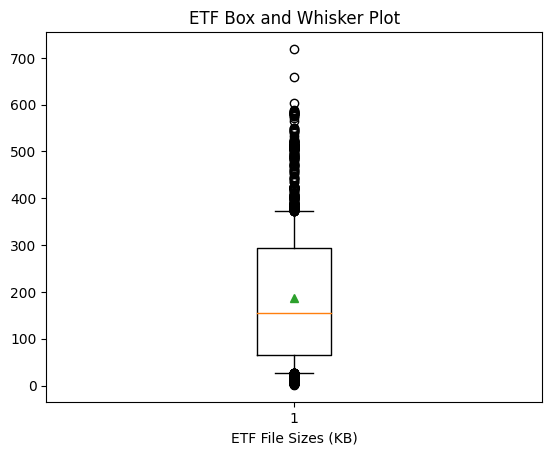

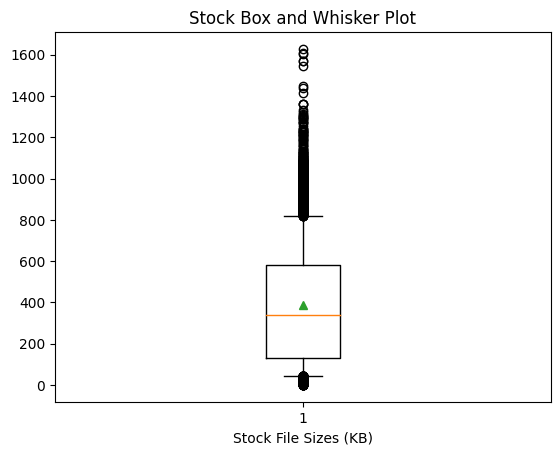

In [ ]:
def plot_box_whisker(file_sizes, dict_name):
    # Get the values from the dictionary
    values = list(file_sizes.values())

    # Calculate the quartiles (Q1, Q2, Q3) and the whisker limits
    Q1 = np.percentile(values, 25)
    Q2 = np.median(values)
    Q3 = np.percentile(values, 75)
    whisker_limits = [10, 90]

    # Create a box and whisker plot
    plt.boxplot(values, whis=whisker_limits, bootstrap=1000, showmeans=True)

    # Customize the plot
    plt.xlabel(f'{dict_name} File Sizes (KB)')
    plt.ylabel('')
    plt.title(f'{dict_name} Box and Whisker Plot')
    plt.show()

etf_f_sizes = load_dict('/content/drive/MyDrive/ai_ml_suite/datasets/spa_db/etf_file_sizes.json')
stock_f_sizes = load_dict('/content/drive/MyDrive/ai_ml_suite/datasets/spa_db/stock_file_sizes.json')

# Plot the box and whisker plot
plot_box_whisker(etf_f_sizes, 'ETF')
plot_box_whisker(stock_f_sizes, 'Stock')

**Extracting Date Ranges from CSV Files**

This code snippet defines several functions to extract date ranges from CSV files. The `string_to_datetime` function converts a string to a `datetime` object using the `"%Y-%m-%d"` format. The `get_date_range_fast` function reads a CSV file and returns the earliest and latest dates, accounting for empty cells at the bottom of the file. The `extract_date_ranges_from_csvs` function takes a directory path and a list of file names, extracts the date ranges from each CSV file, and returns a dictionary where the keys are file names and the values are tuples representing the date range.

The code demonstrates how to use these functions to extract date ranges from two directories containing stock and ETF data. The `stock_1000_dates` and `etf_500_dates` variables are dictionaries containing the date ranges for each file in the respective directories. The code then prints the date ranges for each file.

In [23]:
import datetime
from datetime import date
from datetime import datetime

def string_to_datetime(date_str):
    return datetime.strptime(date_str, "%Y-%m-%d")

def get_date_range_fast(filename):
    with open(filename, 'r') as file:
        next(file)  # Skip the header line
        first_date = next(file).split(',')[0]
        last_date = None
        try:
          last_date = list(file)[-1].split(',')[0]
        except IndexError:
          try:
            list(file)[-1]
            print(f"Warning: {filename} has empty cells at bottom of file")
          except IndexError:
            print(len(list(file)))
            print(f"Warning: {filename} is empty")

        return string_to_datetime(first_date), string_to_datetime(last_date)

def extract_date_ranges_from_csvs(directory, files):
    """Extracts the earliest and latest dates from each CSV file in a directory.

    Args:
        directory: The path to the directory containing the CSV files.

    Returns:
        A dictionary where keys are CSV filenames and values are tuples representing
        the date range (earliest_date, latest_date).
    """

    date_ranges_dict = {}
    for filename in files:
        if filename.endswith('.csv'):
            filepath = os.path.join(directory, filename)
            date_ranges_dict[filename] = get_date_range_fast(filepath)
    return date_ranges_dict

# Example Usage
stock_1000_dates = extract_date_ranges_from_csvs(stock_path, list(stock_1000.keys()))
etf_500_dates = extract_date_ranges_from_csvs(etf_path, list(etf_500.keys()))

# Print the date ranges for each file
print(stock_1000_dates)
print(etf_500_dates)

{'HPQ.csv': ('1962-01-02', '2020-04-01'), 'GE.csv': ('1962-01-02', '2020-04-01'), 'DIS.csv': ('1962-01-02', '2020-04-01'), 'ARNC.csv': ('1962-01-02', '2020-04-01'), 'AA.csv': ('1962-01-02', '2020-04-01'), 'IP.csv': ('1962-01-02', '2020-04-01'), 'MO.csv': ('1962-01-02', '2020-04-01'), 'BA.csv': ('1962-01-02', '2020-04-01'), 'KO.csv': ('1962-01-02', '2020-04-01'), 'MRO.csv': ('1970-01-02', '2020-04-01'), 'HON.csv': ('1970-01-02', '2020-04-01'), 'CNP.csv': ('1970-01-02', '2020-04-01'), 'JNJ.csv': ('1962-01-02', '2020-04-01'), 'BMY.csv': ('1972-06-01', '2020-04-02'), 'AXP.csv': ('1972-06-01', '2020-04-02'), 'F.csv': ('1972-06-01', '2020-04-01'), 'DXC.csv': ('1972-06-01', '2020-04-01'), 'BK.csv': ('1973-05-03', '2020-04-01'), 'DD.csv': ('1972-06-01', '2020-04-01'), 'MCD.csv': ('1966-07-05', '2020-04-01'), 'ETN.csv': ('1972-06-01', '2020-04-01'), 'CAT.csv': ('1962-01-02', '2020-04-01'), 'PNR.csv': ('1973-05-03', '2020-04-01'), 'MATX.csv': ('1973-05-03', '2020-04-01'), 'NI.csv': ('1973-02-21'

In [24]:
save_dict(stock_1000_dates, os.path.join(db_path, 'stock_1000_date_ranges.json'))
save_dict(etf_500_dates, os.path.join(db_path, 'etf_500_date_ranges.json'))

In [6]:
stock_1000_dates = load_dict(os.path.join(db_path, 'stock_1000_date_ranges.json'))
etf_500_dates = load_dict(os.path.join(db_path, 'etf_500_date_ranges.json'))

 **Finding Files with Encompassing Date Ranges**

This code snippet defines two functions: `check_date_format` and `find_files_with_encompassing_date_range`.

`check_date_format` checks if a date is a `datetime` object, and if not, converts it to a `datetime` object if it's a string in the format 'YYYY-MM-DD'.

`find_files_with_encompassing_date_range` takes a date range and a dictionary of filename-date range pairs, and returns a list of filenames whose date ranges encompass the given date range.

The code includes an example usage with a sample data dictionary and a list of test cases. The test cases are tuples of date ranges and expected results (lists of filenames). The code then prints the actual results and compares them to the expected results.

In [36]:
from datetime import datetime

def check_date_format(date):
    """
    Check if a date is a datetime object, if not,
    checks if it is a string and converts it to datetime object
    """
    if not isinstance(date, datetime):
        if isinstance(date, str):
            date = string_to_datetime(date)
        else:
            raise ValueError("Date must be either datetime object or string in the format 'YYYY-MM-DD'")
    return date


def find_files_with_encompassing_date_range(date_range, filename_date_ranges):
    """Finds filenames with date ranges that encompass a given date range."""

    matching_filenames = []
    start_target, end_target = date_range

    start_target = check_date_format(start_target)
    end_target = check_date_format(end_target)

    for filename, file_date_range in filename_date_ranges.items():
        start_file, end_file = file_date_range

        start_file = check_date_format(start_file)
        end_file = check_date_format(end_file)

        if start_file <= start_target and end_file >= end_target:
            matching_filenames.append(filename)

    return matching_filenames

# Example Usage
sample_data = {
    "report1.pdf": (datetime(2024, 1, 15), datetime(2024, 2, 5)),
    "data_log.csv": (datetime(2024, 1, 20), datetime(2024, 1, 30)),
    "image.jpg": (datetime(2024, 1, 10), datetime(2024, 1, 12))
}

test_cases = [
    ((datetime(2024, 1, 16), datetime(2024, 1, 22)), ['report1.pdf']),
    ((datetime(2024, 1, 5), datetime(2024, 1, 15)), []),
    ((datetime(2023, 12, 30), datetime(2024, 1, 3)), []),
    ((datetime(2024, 2, 1), datetime(2024, 2, 2)), ['report1.pdf'])
]

for target_range, expected_result in test_cases:
    result = find_files_with_encompassing_date_range(target_range, sample_data)
    print(f"{result} vs. {expected_result}")
    # assert result == expected_result


['report1.pdf'] vs. ['report1.pdf']
[] vs. []
[] vs. []
['report1.pdf'] vs. ['report1.pdf']


**Assigning Stock and ETF Files to Decades**

This code defines a dictionary `decades` that maps each decade (1970s to 2010s) to a tuple of dates indicating the start and end of the decade. It then iterates over this dictionary to:

1. Find stock and ETF files that fall within each decade's date range using the `find_files_with_encompassing_date_range` function.
2. Create dictionaries `stock_decade_cohorts` and `etf_decade_cohorts` that map each decade to the corresponding set of matching filenames.
3. Print the number of stock and ETF files found for each decade.
4. Print the date ranges for each file in the `stock_decade_cohorts` and `etf_decade_cohorts` dictionaries.

In [37]:
decades = {
"1970s": (datetime(1970, 1, 1), datetime(1979, 12, 31)),
"1980s": (datetime(1980, 1, 1), datetime(1989, 12, 31)),
"1990s": (datetime(1990, 1, 1), datetime(1999, 12, 31)),
"2000s": (datetime(2000, 1, 1), datetime(2009, 12, 31)),
"2010s": (datetime(2010, 1, 1), datetime(2019, 12, 31))
}

stock_decade_cohorts = {}
etf_decade_cohorts = {}
for decade, dateRange in decades.items():
    print(type(dateRange[0]))
    stock_matching_filenames = find_files_with_encompassing_date_range(dateRange, stock_1000_dates)
    stock_decade_cohorts[decade] = stock_matching_filenames
    etf_matching_filenames = find_files_with_encompassing_date_range(dateRange, etf_500_dates)
    etf_decade_cohorts[decade] = etf_matching_filenames
    print(f"{decade}: {len(stock_matching_filenames)} stock files, {len(etf_matching_filenames)} etf files")

# Print the date ranges for each file
print(stock_decade_cohorts)
print(etf_decade_cohorts)

<class 'datetime.datetime'>
1970s: 21 stock files, 0 etf files
<class 'datetime.datetime'>
1980s: 207 stock files, 0 etf files
<class 'datetime.datetime'>
1990s: 883 stock files, 1 etf files
<class 'datetime.datetime'>
2000s: 1000 stock files, 33 etf files
<class 'datetime.datetime'>
2010s: 1000 stock files, 500 etf files
{'1970s': ['HPQ.csv', 'GE.csv', 'DIS.csv', 'ARNC.csv', 'AA.csv', 'IP.csv', 'MO.csv', 'BA.csv', 'KO.csv', 'JNJ.csv', 'MCD.csv', 'CAT.csv', 'IBM.csv', 'PG.csv', 'XOM.csv', 'CVX.csv', 'FL.csv', 'GT.csv', 'ED.csv', 'DTE.csv', 'NAV.csv'], '1980s': ['HPQ.csv', 'GE.csv', 'DIS.csv', 'ARNC.csv', 'AA.csv', 'IP.csv', 'MO.csv', 'BA.csv', 'KO.csv', 'MRO.csv', 'HON.csv', 'CNP.csv', 'JNJ.csv', 'BMY.csv', 'AXP.csv', 'F.csv', 'DXC.csv', 'BK.csv', 'DD.csv', 'MCD.csv', 'ETN.csv', 'CAT.csv', 'PNR.csv', 'MATX.csv', 'NI.csv', 'IBM.csv', 'HAL.csv', 'MDU.csv', 'HRC.csv', 'WRB.csv', 'TRN.csv', 'USB.csv', 'GTY.csv', 'MRK.csv', 'TKR.csv', 'GFF.csv', 'DIOD.csv', 'AIG.csv', 'PFE.csv', 'PG.csv', '

In [40]:
import shutil
save_dict(stock_decade_cohorts, os.path.join(db_path, 'stock_decade_cohorts.json'))
save_dict(etf_decade_cohorts, os.path.join(db_path, 'etf_decade_cohorts.json'))

In [ ]:
stock_decade_cohorts = load_dict(os.path.join(db_path, 'stock_decade_cohorts.json'))
etf_decade_cohorts = load_dict(os.path.join(db_path, 'etf_decade_cohorts.json'))